In [1]:
from RL_cliff.environment import *
from RL_cliff.learning_algorithm import *
import pickle

In [2]:
train = False
load = not train

In [3]:
if train:
    env = Cliff()
    num_avg = 10
    stats = {"SCRN": {}, "SPG": {}}
    for i in range(num_avg):
        np.random.seed = i
        print(f"========== TRAINING RUN {i} OUT OF {num_avg} ===========")
        print("********** TRAINING WITH SCRN **********")
        stats_SCRN = discrete_SCRN(env, num_episodes=3000)
        stats["SCRN"].update({i: stats_SCRN})
        print("********** TRAINING WITH SPG ********")
        stats_DPG = discrete_policy_gradient(env, num_episodes=3000)
        stats["SPG"].update({i: stats_DPG})
    average_stats = {"SCRN": {}, "SPG": {}}
    average_stats["SCRN"] = {key: np.median([stats["SCRN"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]}
    average_stats["SPG"] = {key: np.median([stats["SPG"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]} 
    with open("results.pkl", "wb") as handle:
        pickle.dump(average_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("results.pkl", "rb") as f:
        average_stats = pickle.load(f)

In [4]:
show_SCRN = True
show_SPG = True

<Figure size 640x480 with 0 Axes>

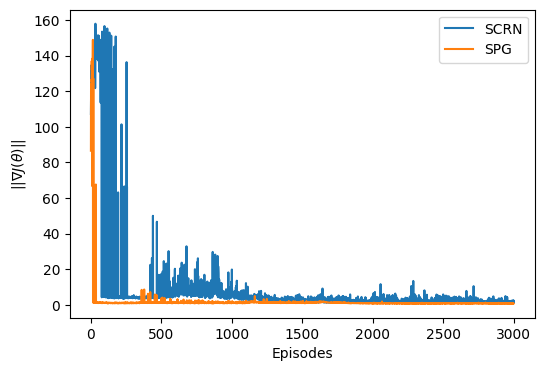

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.figure(figsize=(6, 4))
if show_SCRN:
    plt.plot(average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["gradients"], label="SPG")
plt.ylabel(r"$\vert \vert \nabla J(\theta) \vert \vert$")
plt.xlabel("Episodes")
plt.legend(loc="best")
plt.show()

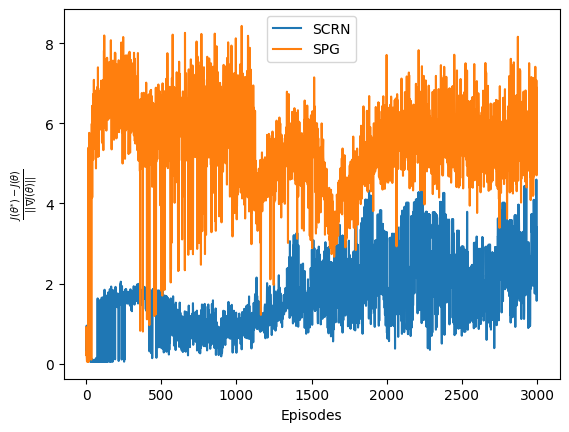

In [6]:
plt.figure()
if show_SCRN:
    plt.plot((average_stats["SCRN"]["optimum"]-average_stats["SCRN"]["objectives"])/average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot((average_stats["SPG"]["optimum"]-average_stats["SPG"]["objectives"])/average_stats["SPG"]["gradients"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$")
plt.show()

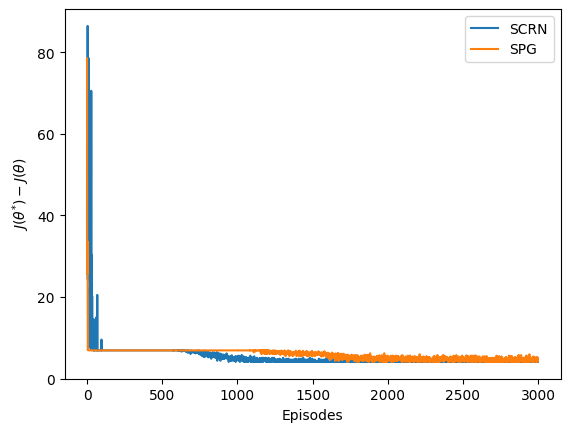

In [7]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["optimum"] - average_stats["SCRN"]["objectives"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["optimum"] - average_stats["SPG"]["objectives"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$J(\theta^{*}) - J(\theta)$")
plt.show()

In [ ]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["rewards"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["rewards"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel("Rewards during training")
plt.show()

In [8]:
def compare_probabilities_learned(average_stats, state, save_link):
    """
    Compare probabilities learned during training
    """

    fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(6, 4))
    plt.tight_layout()
    fig.subplots_adjust(top=0.9, left=0.1, right=0., bottom=0.12)
    
    fig.suptitle(f"Probabilities for state {state}")
    
    length = average_stats["SPG"]["history_probs"].shape[0]
    
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 0] for j in range(length)], label="SPG - P(up)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 1] for j in range(length)], label="SPG - P(down)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 0] for j in range(length)], label="SCRN - P(up)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 1] for j in range(length)], label="SCRN - P(down)")

    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 2] for j in range(length)], label="SPG - P(left)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 3] for j in range(length)], label="SPG - P(right)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 2] for j in range(length)], label="SCRN - P(left)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 3] for j in range(length)], label="SCRN - P(right)")

    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

    ax[0].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[0].set_xlabel("Episode", fontsize=20)

    ax[1].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[1].set_xlabel("Episode", fontsize=20)

    ax[0].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[0].set_xticks(np.linspace(0, length, 6), fontsize=15)
    ax[1].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[1].set_xticks(np.linspace(0, length, 6), fontsize=15)
    
    plt.savefig(save_link)
    plt.show()
    
    return fig, ax

In [ ]:
for j in range(48):
    compare_probabilities_learned(average_stats, j, f"figures/comparison/probabilities_{j}.png")

In [3]:
env = Cliff()
stats = discrete_SCRN(env, num_episodes=3000)

1 :  1.0
2 :  9.0
3 :  14.0
4 :  54.0
5 :  7.0
6 :  3.0
7 :  1.0
8 :  2.0
9 :  1.0
10 :  3.0
11 :  2.0
12 :  3.0
13 :  1.0
14 :  29.0
15 :  1.0
16 :  1.0
17 :  23.0
18 :  1.0
19 :  1.0
20 :  22.0
21 :  4.0
22 :  19.0
23 :  21.0
24 :  22.0
25 :  13.0
26 :  78.0
27 :  38.0
28 :  23.0
29 :  19.0
30 :  16.0
31 :  1.0
32 :  63.0
33 :  5.0
34 :  55.0
35 :  90.0
36 :  72.0
37 :  68.0
38 :  35.0


C:\Users\Federico Betti\Documents\GitHub\Global-Convergence-in-RL\RL_cliff\learning_algorithm.py:312: ComplexWarning: Casting complex values to real discards the imaginary part
  Hessians[episode] = np.linalg.eig(Hessian_traj)[0]


39 :  5.0
40 :  1.0
41 :  55.0
42 :  30.0
43 :  100.0
44 :  41.0
45 :  43.0
46 :  100.0
47 :  5.0
48 :  1.0
49 :  18.0
50 :  90.0
51 :  12.0
52 :  1.0
53 :  66.0
54 :  28.0
55 :  15.0
56 :  19.0
57 :  24.0
58 :  79.0
59 :  7.0
60 :  58.0
61 :  85.0
62 :  1.0
63 :  60.0
64 :  61.0
65 :  13.0
66 :  62.0
67 :  43.0
68 :  43.0
69 :  30.0
70 :  61.0
71 :  18.0
72 :  64.0
73 :  100.0
74 :  100.0
75 :  27.0
76 :  32.0
77 :  22.0
78 :  100.0
79 :  23.0
80 :  100.0
81 :  67.0
82 :  19.0
83 :  100.0
84 :  1.0
85 :  50.0
86 :  27.0
87 :  22.0
88 :  100.0
89 :  94.0
90 :  100.0
91 :  60.0
92 :  100.0
93 :  9.0
94 :  59.0
95 :  100.0
96 :  71.0
97 :  100.0
98 :  100.0
99 :  100.0
100 :  55.0
101 :  100.0
102 :  98.0
103 :  14.0
104 :  100.0
105 :  17.0
106 :  81.0
107 :  100.0
108 :  91.0
109 :  100.0
110 :  100.0
111 :  100.0
112 :  100.0
113 :  100.0
114 :  25.0
115 :  100.0
116 :  100.0
117 :  24.0
118 :  35.0
119 :  36.0
120 :  100.0
121 :  6.0
122 :  100.0
123 :  57.0
124 :  100.0
125 :  100.0

580 :  100.0
581 :  100.0
582 :  100.0
583 :  100.0
584 :  100.0
585 :  100.0
586 :  100.0
===== Goal reached in 75 steps =====
587 :  75.0
588 :  100.0
589 :  100.0
590 :  100.0
591 :  100.0
===== Goal reached in 75 steps =====
592 :  75.0
===== Goal reached in 33 steps =====
593 :  33.0
594 :  100.0
===== Goal reached in 54 steps =====
595 :  54.0
===== Goal reached in 35 steps =====
596 :  35.0
===== Goal reached in 86 steps =====
597 :  86.0
===== Goal reached in 32 steps =====
598 :  32.0
599 :  100.0
600 :  100.0
===== Goal reached in 91 steps =====
601 :  91.0
602 :  94.0
===== Goal reached in 26 steps =====
603 :  26.0
===== Goal reached in 71 steps =====
604 :  71.0
===== Goal reached in 50 steps =====
605 :  50.0
===== Goal reached in 83 steps =====
606 :  83.0
607 :  100.0
608 :  100.0
===== Goal reached in 27 steps =====
609 :  27.0
610 :  100.0
===== Goal reached in 60 steps =====
611 :  60.0
===== Goal reached in 51 steps =====
612 :  51.0
===== Goal reached in 71 steps =

784 :  17.0
===== Goal reached in 19 steps =====
785 :  19.0
===== Goal reached in 17 steps =====
786 :  17.0
===== Goal reached in 17 steps =====
787 :  17.0
===== Goal reached in 21 steps =====
788 :  21.0
===== Goal reached in 23 steps =====
789 :  23.0
===== Goal reached in 26 steps =====
790 :  26.0
===== Goal reached in 18 steps =====
791 :  18.0
===== Goal reached in 30 steps =====
792 :  30.0
===== Goal reached in 18 steps =====
793 :  18.0
===== Goal reached in 19 steps =====
794 :  19.0
===== Goal reached in 18 steps =====
795 :  18.0
===== Goal reached in 19 steps =====
796 :  19.0
===== Goal reached in 19 steps =====
797 :  19.0
===== Goal reached in 23 steps =====
798 :  23.0
===== Goal reached in 19 steps =====
799 :  19.0
===== Goal reached in 18 steps =====
800 :  18.0
===== Goal reached in 19 steps =====
801 :  19.0
===== Goal reached in 17 steps =====
802 :  17.0
===== Goal reached in 22 steps =====
803 :  22.0
===== Goal reached in 18 steps =====
804 :  18.0
===== Go

973 :  17.0
===== Goal reached in 19 steps =====
974 :  19.0
===== Goal reached in 19 steps =====
975 :  19.0
===== Goal reached in 19 steps =====
976 :  19.0
===== Goal reached in 17 steps =====
977 :  17.0
===== Goal reached in 17 steps =====
978 :  17.0
===== Goal reached in 17 steps =====
979 :  17.0
===== Goal reached in 18 steps =====
980 :  18.0
===== Goal reached in 17 steps =====
981 :  17.0
===== Goal reached in 17 steps =====
982 :  17.0
===== Goal reached in 20 steps =====
983 :  20.0
===== Goal reached in 17 steps =====
984 :  17.0
===== Goal reached in 17 steps =====
985 :  17.0
===== Goal reached in 20 steps =====
986 :  20.0
===== Goal reached in 17 steps =====
987 :  17.0
===== Goal reached in 18 steps =====
988 :  18.0
===== Goal reached in 17 steps =====
989 :  17.0
===== Goal reached in 19 steps =====
990 :  19.0
===== Goal reached in 17 steps =====
991 :  17.0
===== Goal reached in 18 steps =====
992 :  18.0
===== Goal reached in 19 steps =====
993 :  19.0
===== Go

1158 :  17.0
===== Goal reached in 18 steps =====
1159 :  18.0
===== Goal reached in 17 steps =====
1160 :  17.0
===== Goal reached in 17 steps =====
1161 :  17.0
===== Goal reached in 17 steps =====
1162 :  17.0
===== Goal reached in 19 steps =====
1163 :  19.0
===== Goal reached in 17 steps =====
1164 :  17.0
===== Goal reached in 17 steps =====
1165 :  17.0
===== Goal reached in 18 steps =====
1166 :  18.0
===== Goal reached in 18 steps =====
1167 :  18.0
===== Goal reached in 20 steps =====
1168 :  20.0
===== Goal reached in 17 steps =====
1169 :  17.0
===== Goal reached in 17 steps =====
1170 :  17.0
===== Goal reached in 17 steps =====
1171 :  17.0
===== Goal reached in 17 steps =====
1172 :  17.0
===== Goal reached in 17 steps =====
1173 :  17.0
===== Goal reached in 17 steps =====
1174 :  17.0
===== Goal reached in 18 steps =====
1175 :  18.0
===== Goal reached in 18 steps =====
1176 :  18.0
===== Goal reached in 19 steps =====
1177 :  19.0
===== Goal reached in 17 steps =====


1350 :  17.0
===== Goal reached in 17 steps =====
1351 :  17.0
===== Goal reached in 17 steps =====
1352 :  17.0
===== Goal reached in 17 steps =====
1353 :  17.0
===== Goal reached in 19 steps =====
1354 :  19.0
===== Goal reached in 17 steps =====
1355 :  17.0
===== Goal reached in 17 steps =====
1356 :  17.0
===== Goal reached in 17 steps =====
1357 :  17.0
===== Goal reached in 18 steps =====
1358 :  18.0
===== Goal reached in 17 steps =====
1359 :  17.0
===== Goal reached in 17 steps =====
1360 :  17.0
===== Goal reached in 18 steps =====
1361 :  18.0
===== Goal reached in 19 steps =====
1362 :  19.0
===== Goal reached in 17 steps =====
1363 :  17.0
===== Goal reached in 17 steps =====
1364 :  17.0
===== Goal reached in 17 steps =====
1365 :  17.0
===== Goal reached in 18 steps =====
1366 :  18.0
===== Goal reached in 17 steps =====
1367 :  17.0
===== Goal reached in 17 steps =====
1368 :  17.0
===== Goal reached in 17 steps =====
1369 :  17.0
===== Goal reached in 17 steps =====


1543 :  17.0
===== Goal reached in 17 steps =====
1544 :  17.0
===== Goal reached in 17 steps =====
1545 :  17.0
===== Goal reached in 18 steps =====
1546 :  18.0
===== Goal reached in 17 steps =====
1547 :  17.0
===== Goal reached in 17 steps =====
1548 :  17.0
===== Goal reached in 17 steps =====
1549 :  17.0
===== Goal reached in 17 steps =====
1550 :  17.0
===== Goal reached in 17 steps =====
1551 :  17.0
===== Goal reached in 17 steps =====
1552 :  17.0
===== Goal reached in 17 steps =====
1553 :  17.0
===== Goal reached in 21 steps =====
1554 :  21.0
===== Goal reached in 17 steps =====
1555 :  17.0
===== Goal reached in 17 steps =====
1556 :  17.0
===== Goal reached in 18 steps =====
1557 :  18.0
===== Goal reached in 19 steps =====
1558 :  19.0
===== Goal reached in 17 steps =====
1559 :  17.0
===== Goal reached in 17 steps =====
1560 :  17.0
===== Goal reached in 17 steps =====
1561 :  17.0
===== Goal reached in 17 steps =====
1562 :  17.0
===== Goal reached in 19 steps =====


1732 :  17.0
===== Goal reached in 18 steps =====
1733 :  18.0
===== Goal reached in 18 steps =====
1734 :  18.0
===== Goal reached in 17 steps =====
1735 :  17.0
===== Goal reached in 18 steps =====
1736 :  18.0
===== Goal reached in 17 steps =====
1737 :  17.0
===== Goal reached in 17 steps =====
1738 :  17.0
===== Goal reached in 18 steps =====
1739 :  18.0
===== Goal reached in 17 steps =====
1740 :  17.0
===== Goal reached in 17 steps =====
1741 :  17.0
===== Goal reached in 17 steps =====
1742 :  17.0
===== Goal reached in 17 steps =====
1743 :  17.0
===== Goal reached in 17 steps =====
1744 :  17.0
===== Goal reached in 17 steps =====
1745 :  17.0
===== Goal reached in 17 steps =====
1746 :  17.0
===== Goal reached in 17 steps =====
1747 :  17.0
===== Goal reached in 17 steps =====
1748 :  17.0
===== Goal reached in 17 steps =====
1749 :  17.0
===== Goal reached in 19 steps =====
1750 :  19.0
===== Goal reached in 17 steps =====
1751 :  17.0
===== Goal reached in 17 steps =====


1897 :  18.0
===== Goal reached in 17 steps =====
1898 :  17.0
===== Goal reached in 17 steps =====
1899 :  17.0
===== Goal reached in 17 steps =====
1900 :  17.0
===== Goal reached in 18 steps =====
1901 :  18.0
===== Goal reached in 17 steps =====
1902 :  17.0
===== Goal reached in 17 steps =====
1903 :  17.0
===== Goal reached in 19 steps =====
1904 :  19.0
===== Goal reached in 17 steps =====
1905 :  17.0
===== Goal reached in 17 steps =====
1906 :  17.0
===== Goal reached in 17 steps =====
1907 :  17.0
===== Goal reached in 20 steps =====
1908 :  20.0
===== Goal reached in 17 steps =====
1909 :  17.0
===== Goal reached in 17 steps =====
1910 :  17.0
===== Goal reached in 17 steps =====
1911 :  17.0
===== Goal reached in 17 steps =====
1912 :  17.0
===== Goal reached in 18 steps =====
1913 :  18.0
===== Goal reached in 18 steps =====
1914 :  18.0
===== Goal reached in 19 steps =====
1915 :  19.0
===== Goal reached in 17 steps =====
1916 :  17.0
===== Goal reached in 17 steps =====


2090 :  17.0
===== Goal reached in 17 steps =====
2091 :  17.0
===== Goal reached in 18 steps =====
2092 :  18.0
===== Goal reached in 17 steps =====
2093 :  17.0
===== Goal reached in 18 steps =====
2094 :  18.0
===== Goal reached in 17 steps =====
2095 :  17.0
===== Goal reached in 17 steps =====
2096 :  17.0
===== Goal reached in 17 steps =====
2097 :  17.0
===== Goal reached in 18 steps =====
2098 :  18.0
===== Goal reached in 17 steps =====
2099 :  17.0
===== Goal reached in 17 steps =====
2100 :  17.0
===== Goal reached in 17 steps =====
2101 :  17.0
===== Goal reached in 17 steps =====
2102 :  17.0
===== Goal reached in 17 steps =====
2103 :  17.0
===== Goal reached in 18 steps =====
2104 :  18.0
===== Goal reached in 17 steps =====
2105 :  17.0
===== Goal reached in 19 steps =====
2106 :  19.0
===== Goal reached in 18 steps =====
2107 :  18.0
===== Goal reached in 17 steps =====
2108 :  17.0
===== Goal reached in 18 steps =====
2109 :  18.0
===== Goal reached in 17 steps =====


===== Goal reached in 18 steps =====
2283 :  18.0
===== Goal reached in 17 steps =====
2284 :  17.0
===== Goal reached in 17 steps =====
2285 :  17.0
===== Goal reached in 19 steps =====
2286 :  19.0
===== Goal reached in 17 steps =====
2287 :  17.0
===== Goal reached in 17 steps =====
2288 :  17.0
===== Goal reached in 18 steps =====
2289 :  18.0
===== Goal reached in 17 steps =====
2290 :  17.0
===== Goal reached in 17 steps =====
2291 :  17.0
===== Goal reached in 18 steps =====
2292 :  18.0
===== Goal reached in 17 steps =====
2293 :  17.0
===== Goal reached in 17 steps =====
2294 :  17.0
===== Goal reached in 17 steps =====
2295 :  17.0
===== Goal reached in 17 steps =====
2296 :  17.0
===== Goal reached in 17 steps =====
2297 :  17.0
===== Goal reached in 17 steps =====
2298 :  17.0
===== Goal reached in 17 steps =====
2299 :  17.0
===== Goal reached in 17 steps =====
2300 :  17.0
===== Goal reached in 17 steps =====
2301 :  17.0
===== Goal reached in 17 steps =====
2302 :  17.0


2469 :  17.0
===== Goal reached in 17 steps =====
2470 :  17.0
===== Goal reached in 17 steps =====
2471 :  17.0
===== Goal reached in 19 steps =====
2472 :  19.0
===== Goal reached in 17 steps =====
2473 :  17.0
===== Goal reached in 17 steps =====
2474 :  17.0
===== Goal reached in 17 steps =====
2475 :  17.0
===== Goal reached in 17 steps =====
2476 :  17.0
===== Goal reached in 17 steps =====
2477 :  17.0
===== Goal reached in 17 steps =====
2478 :  17.0
===== Goal reached in 19 steps =====
2479 :  19.0
===== Goal reached in 17 steps =====
2480 :  17.0
===== Goal reached in 17 steps =====
2481 :  17.0
===== Goal reached in 17 steps =====
2482 :  17.0
===== Goal reached in 17 steps =====
2483 :  17.0
===== Goal reached in 22 steps =====
2484 :  22.0
===== Goal reached in 17 steps =====
2485 :  17.0
===== Goal reached in 17 steps =====
2486 :  17.0
===== Goal reached in 17 steps =====
2487 :  17.0
===== Goal reached in 17 steps =====
2488 :  17.0
===== Goal reached in 17 steps =====


===== Goal reached in 17 steps =====
2661 :  17.0
===== Goal reached in 17 steps =====
2662 :  17.0
===== Goal reached in 17 steps =====
2663 :  17.0
===== Goal reached in 17 steps =====
2664 :  17.0
===== Goal reached in 17 steps =====
2665 :  17.0
===== Goal reached in 17 steps =====
2666 :  17.0
===== Goal reached in 18 steps =====
2667 :  18.0
===== Goal reached in 17 steps =====
2668 :  17.0
===== Goal reached in 17 steps =====
2669 :  17.0
===== Goal reached in 17 steps =====
2670 :  17.0
===== Goal reached in 17 steps =====
2671 :  17.0
===== Goal reached in 17 steps =====
2672 :  17.0
===== Goal reached in 17 steps =====
2673 :  17.0
===== Goal reached in 17 steps =====
2674 :  17.0
===== Goal reached in 17 steps =====
2675 :  17.0
===== Goal reached in 17 steps =====
2676 :  17.0
===== Goal reached in 17 steps =====
2677 :  17.0
===== Goal reached in 17 steps =====
2678 :  17.0
===== Goal reached in 19 steps =====
2679 :  19.0
===== Goal reached in 17 steps =====
2680 :  17.0


===== Goal reached in 17 steps =====
2855 :  17.0
===== Goal reached in 17 steps =====
2856 :  17.0
===== Goal reached in 18 steps =====
2857 :  18.0
===== Goal reached in 17 steps =====
2858 :  17.0
===== Goal reached in 17 steps =====
2859 :  17.0
===== Goal reached in 17 steps =====
2860 :  17.0
===== Goal reached in 17 steps =====
2861 :  17.0
===== Goal reached in 19 steps =====
2862 :  19.0
===== Goal reached in 17 steps =====
2863 :  17.0
===== Goal reached in 17 steps =====
2864 :  17.0
===== Goal reached in 17 steps =====
2865 :  17.0
===== Goal reached in 17 steps =====
2866 :  17.0
===== Goal reached in 17 steps =====
2867 :  17.0
===== Goal reached in 17 steps =====
2868 :  17.0
===== Goal reached in 17 steps =====
2869 :  17.0
===== Goal reached in 17 steps =====
2870 :  17.0
===== Goal reached in 17 steps =====
2871 :  17.0
===== Goal reached in 17 steps =====
2872 :  17.0
===== Goal reached in 17 steps =====
2873 :  17.0
===== Goal reached in 17 steps =====
2874 :  17.0


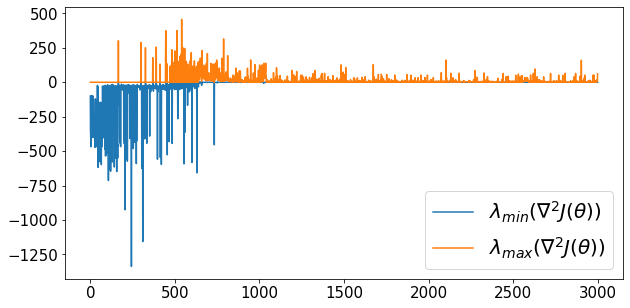

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(np.min(stats["Hessians"], axis=1), label=r"$\lambda_{min} (\nabla^2 J(\theta))$")
plt.plot(np.max(stats["Hessians"], axis=1), label=r"$\lambda_{max} (\nabla^2 J(\theta))$")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc="best", fontsize=20)